In [1]:
#importing some basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
raw = pd.read_excel(r"C:\Users\Siddhant Sonawane\OneDrive\Documents\ExcelR Project\DS Projects\Customer Personality Analysis\Customer personality Analysis.xlsx")
raw

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524.0,1957.0,Graduation,Single,58138.0,0.0,0.0,2012-09-04,58.0,635.0,...,7.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,1.0
1,2174.0,1954.0,Graduation,Single,46344.0,1.0,1.0,2014-03-08,38.0,11.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
2,4141.0,1965.0,Graduation,Together,71613.0,0.0,0.0,2013-08-21,26.0,426.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
3,6182.0,1984.0,Graduation,Together,26646.0,1.0,0.0,2014-02-10,26.0,11.0,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
4,5324.0,1981.0,PhD,Married,58293.0,1.0,0.0,2014-01-19,94.0,173.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870.0,1967.0,Graduation,Married,61223.0,0.0,1.0,2013-06-13,46.0,709.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
2236,4001.0,1946.0,PhD,Together,64014.0,2.0,1.0,2014-06-10,56.0,406.0,...,7.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,11.0,0.0
2237,7270.0,1981.0,Graduation,Divorced,56981.0,0.0,0.0,2014-01-25,91.0,908.0,...,6.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
2238,8235.0,1956.0,Master,Together,69245.0,0.0,1.0,2014-01-24,8.0,428.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0


In [3]:
#checking info of data
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   float64       
 1   Year_Birth           2240 non-null   float64       
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   float64       
 6   Teenhome             2240 non-null   float64       
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   float64       
 9   MntWines             2240 non-null   float64       
 10  MntFruits            2240 non-null   float64       
 11  MntMeatProducts      2240 non-null   float64       
 12  MntFishProducts      2240 non-null   float64       
 13  MntSweetProducts     2240 non-nul

## Data Set Details

#### People

#### Product

#### Promotion

#### Place

In [4]:
#Description of data
raw.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [5]:
#checking null values
raw.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Observation : From the above result we observe some null in the "Income" column.

In [6]:
#checking duplicates in ID column
raw['ID'].duplicated().sum()

0

##### Observation : From the above result we can conclude that there are no null values present in the data.

In [7]:
raw.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [8]:
raw['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

### Creating features based on existing features

In [9]:
# feature for age
raw['Age'] = (2022 - raw['Year_Birth'])
# feature for living status
raw['Living_with'] = raw['Marital_Status'].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone"})
# feature for total children
raw['Childrenhome'] = raw['Kidhome'] + raw['Teenhome']
# feature for to simplify Education background
raw['Education'] = raw["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})
#Created a feature "Customer_For"
def get_different_year():
    registration_year = pd.to_datetime(raw['Dt_Customer'], format='%d-%m-%Y').apply(lambda x: x.year)
    current_year = datetime.datetime.now().year
    return current_year - registration_year

raw['Years_Since_Registration'] = get_different_year()  # Number of years since customer registration
raw["Years_Since_Registration"] = pd.to_numeric(raw["Years_Since_Registration"], errors="coerce")

In [10]:
#creating Total Expenses feature
raw['Total_Exp'] = raw['MntWines']+raw['MntFruits']+raw['MntMeatProducts']+raw['MntFishProducts']+raw['MntSweetProducts']+raw['MntGoldProds']

#creating Total Purpchases feature
raw['Total_Pur'] = raw['NumDealsPurchases']+raw['NumWebPurchases']+raw['NumCatalogPurchases']+raw['NumStorePurchases']

#creating Total Accepted Campaign 
raw['Total_Acc_Cmp'] = raw['AcceptedCmp1']+raw['AcceptedCmp2']+raw['AcceptedCmp3']+raw['AcceptedCmp4']+raw['AcceptedCmp5']+raw['Response']

In [11]:
#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth"]
raw = raw.drop(to_drop, axis=1)

In [12]:
raw

,ID,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp2,Complain,Response,Age,Living_with,Childrenhome,Years_Since_Registration,Total_Exp,Total_Pur,Total_Acc_Cmp
0,5524.0,Graduate,58138.0,0.0,0.0,58.0,635.0,88.0,546.0,172.0,...,0.0,0.0,1.0,65.0,Alone,0.0,12,1617.0,25.0,1.0
1,2174.0,Graduate,46344.0,1.0,1.0,38.0,11.0,1.0,6.0,2.0,...,0.0,0.0,0.0,68.0,Alone,2.0,10,27.0,6.0,0.0
2,4141.0,Graduate,71613.0,0.0,0.0,26.0,426.0,49.0,127.0,111.0,...,0.0,0.0,0.0,57.0,Partner,0.0,11,776.0,21.0,0.0
3,6182.0,Graduate,26646.0,1.0,0.0,26.0,11.0,4.0,20.0,10.0,...,0.0,0.0,0.0,38.0,Partner,1.0,10,53.0,8.0,0.0
4,5324.0,Postgraduate,58293.0,1.0,0.0,94.0,173.0,43.0,118.0,46.0,...,0.0,0.0,0.0,41.0,Partner,1.0,10,422.0,19.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870.0,Graduate,61223.0,0.0,1.0,46.0,709.0,43.0,182.0,42.0,...,0.0,0.0,0.0,55.0,Partner,1.0,11,1341.0,18.0,0.0
2236,4001.0,Postgraduate,64014.0,2.0,1.0,56.0,406.0,0.0,30.0,0.0,...,0.0,0.0,0.0,76.0,Partner,3.0,10,444.0,22.0,1.0
2237,7270.0,Graduate,56981.0,0.0,0.0,91.0,908.0,48.0,217.0,32.0,...,0.0,0.0,0.0,41.0,Alone,0.0,10,1241.0,19.0,1.0
2238,8235.0,Postgraduate,69245.0,0.0,1.0,8.0,428.0,30.0,214.0,80.0,...,0.0,0.0,0.0,66.0,Partner,1.0,10,843.0,23.0,0.0


In [13]:
raw[['Age','Total_Exp','Total_Pur','Total_Acc_Cmp','Years_Since_Registration']].describe() #description of created features

,Age,Total_Exp,Total_Pur,Total_Acc_Cmp,Years_Since_Registration
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,53.194196,605.798214,14.862054,0.446875,10.971875
std,11.984069,602.249288,7.677173,0.890543,0.684554
min,26.000000,5.000000,0.000000,0.000000,10.000000
25%,45.000000,68.750000,8.000000,0.000000,11.000000
50%,52.000000,396.000000,15.000000,0.000000,11.000000
75%,63.000000,1045.500000,21.000000,1.000000,11.000000
max,129.000000,2525.000000,44.000000,5.000000,12.000000


### DataCleaning

#### Droping missing values

In [14]:
print("previous shape:",raw.shape)
raw = raw.dropna()
print(" after removing null values:", raw.shape)

previous shape: (2240, 31)
 after removing null values: (2216, 31)


####  Outliers removal

In [15]:
def remove_outlier(data : pd.DataFrame,column: str) -> pd.Series:
    q3,q1= np.nanpercentile(data[column],[75,25])
    iqr = q3-q1
    upper_bound = q3 + 1.5*iqr
    lower_bound = q1 - 1.5*iqr
    data = data[(data[column]>lower_bound) & (data[column]<upper_bound)]
    return data 
raw = remove_outlier(raw,'Age')
raw = remove_outlier(raw,'Income')

### Data Visualization

### Univariate Analysis

Text(0.5, 1.0, 'Age')

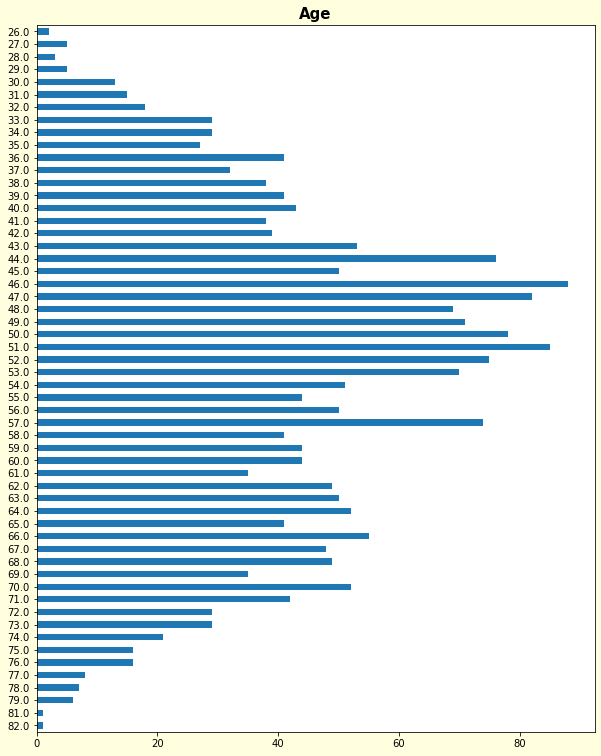

In [16]:
plt.figure(figsize=(10,13),facecolor="lightyellow",edgecolor='black')
raw['Age'].value_counts().sort_index(ascending=False).plot(kind='barh')
plt.title('Age',fontsize=15,fontweight='semibold')

##### Observation: From the above "Age" plot we can see that,most customers are form the age group 43-58 years.

Text(0.5, 1.0, 'Income')

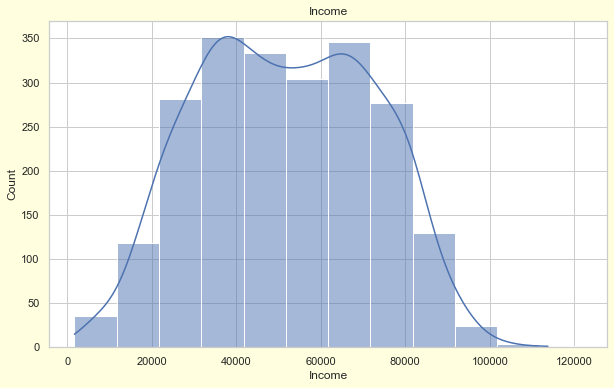

In [17]:
plt.figure(figsize=(10,6),facecolor="lightyellow")
sns.set(style='whitegrid')
ax = sns.histplot(data=raw,x=raw['Income'],binwidth=10000,kde=True)
ax.set_title('Income')

##### Observation : Most of the Customers have the income between 30000-80000.

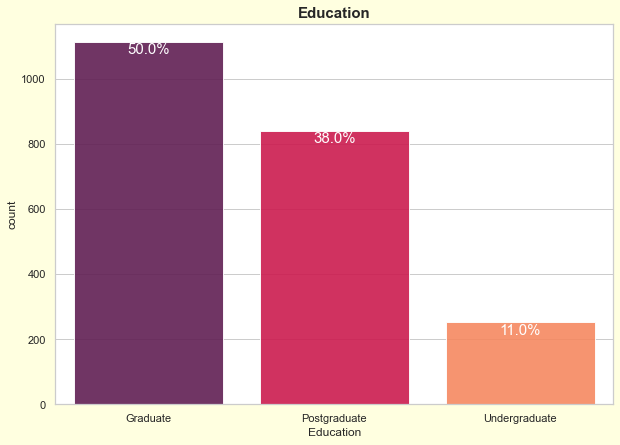

In [18]:
plt.figure(figsize=(10,7),facecolor='lightyellow')
sns.set(style='whitegrid')
ax=sns.countplot(data=raw,x='Education',saturation=1,alpha=0.9,palette='rocket',order=raw['Education'].value_counts().index)
ax.set_title('Education',fontsize=15,fontweight='semibold')

for p in ax.patches:
    ax.annotate(f'\n{np.round((p.get_height()/2240)*100)}%',(p.get_x() + p.get_width()/2.,p.get_height()),ha='center',va='center',color='white',size=15)
plt.show()

##### Observation : Most of the Customers come from the Graduated  education background.

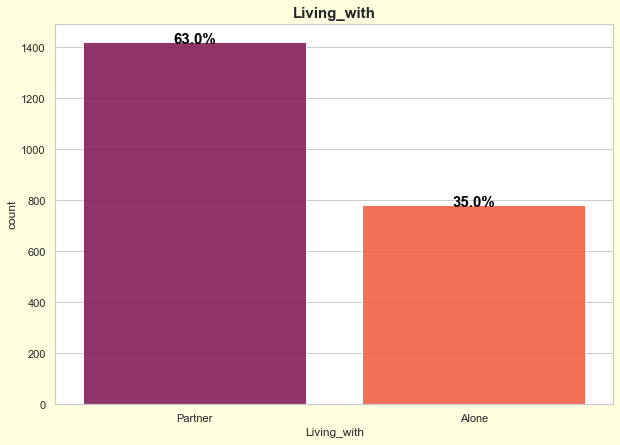

In [19]:
plt.figure(figsize=(10,7),facecolor='lightyellow')
sns.set(style='whitegrid')
ax = sns.countplot(data=raw,x='Living_with',saturation=1,alpha=0.9,palette='rocket',order=raw['Living_with'].value_counts().index)
ax.set_title('Living_with',fontsize=15,fontweight='semibold')

for p in ax.patches:
    ax.annotate(f'\n{np.round((p.get_height()/2240)*100)}%',(p.get_x() + p.get_width()/2.,p.get_height()),ha='center',va='center',xytext=(0,10),textcoords='offset points',color='black',fontweight=
               'semibold',fontsize=15)

##### Observation : Based on the above graph,most of the customers are already Married.

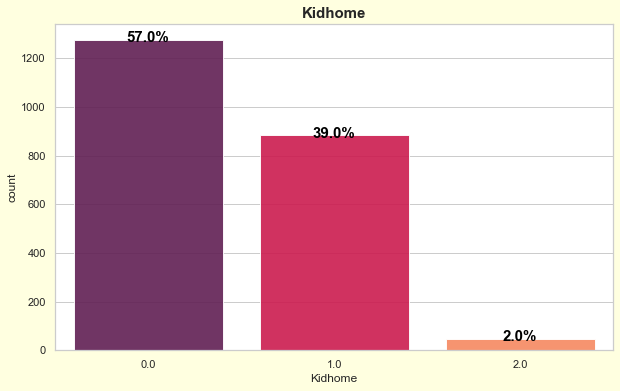

In [20]:
plt.figure(figsize=(10,6),facecolor="lightyellow")
sns.set(style='whitegrid')
ax = sns.countplot(data=raw,x='Kidhome',palette='rocket',saturation=1,alpha=0.9,order=raw['Kidhome'].value_counts().index)
ax.set_title('Kidhome',fontsize=15,fontweight='semibold')

for p in ax.patches:
    ax.annotate(f'\n{np.round((p.get_height()/2240)*100)}%',(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',va='center',xytext=(0,10),textcoords='offset points',color='black',fontweight='semibold',fontsize=15)

##### Observation : Based on the graph,most of the Customer don't have kids.

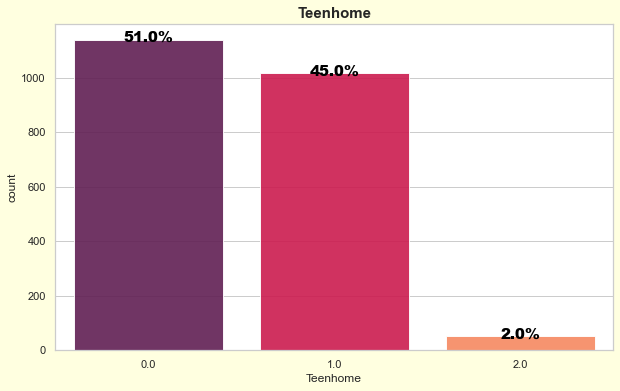

In [21]:
plt.figure(figsize=(10,6),facecolor='lightyellow')
sns.set(style='whitegrid')
ax = sns.countplot(data=raw,x='Teenhome',saturation=1,alpha=0.9,palette='rocket',order=raw['Teenhome'].value_counts().index)
ax.set_title('Teenhome',fontsize=15,fontweight='semibold')

for p in ax.patches:
    ax.annotate(f'\n{np.round((p.get_height()/2240)*100)}%',(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',va='center',xytext=(0,10),textcoords='offset points',color='black',fontweight='black',fontsize=15)

#### Observation : From the above graph,most of the customer don't have have teens.

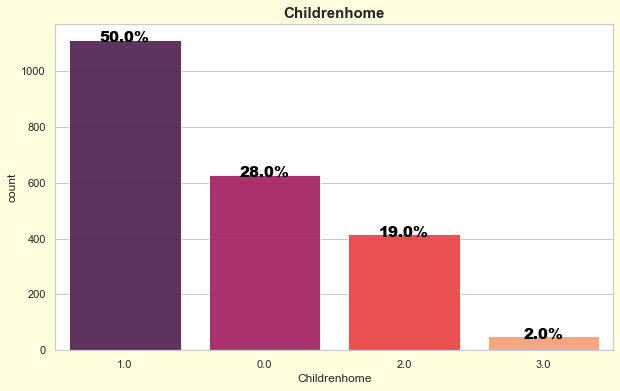

In [22]:
plt.figure(figsize=(10,6),facecolor='lightyellow')
sns.set(style='whitegrid')
ax = sns.countplot(data=raw,x='Childrenhome',saturation=1,alpha=0.9,palette='rocket',order=raw['Childrenhome'].value_counts().index)
ax.set_title('Childrenhome',fontsize=15,fontweight='semibold')

for p in ax.patches:
    ax.annotate(f'\n{np.round((p.get_height()/2240)*100)}%',(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',va='center',xytext=(0,10),textcoords='offset points',color='black',fontweight='black',fontsize=15)

##### observation : from the above graph, we can conclude that most of the customer have only one child at their home

In [23]:
total_1 = raw['Total_Exp'].sum()
total_2 = raw['Total_Acc_Cmp'].sum()
total_3 = raw['Total_Pur'].sum()
print(total_1,total_2,total_3)

1338042.0 993.0 32828.0


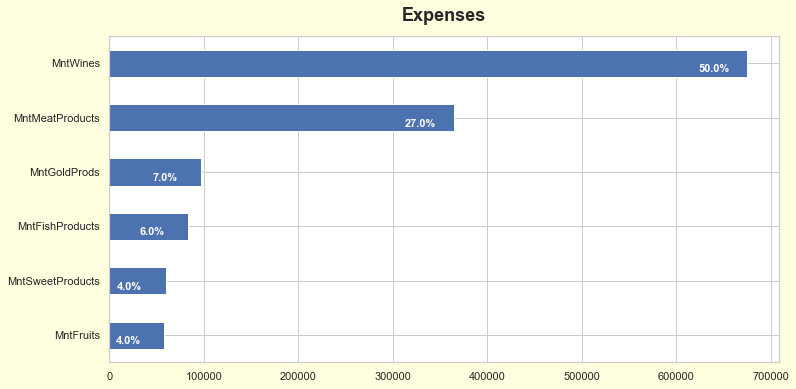

In [24]:
plt.figure(figsize=(12,6),facecolor='lightyellow')
sns.set(style='whitegrid')
ax=raw[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum().sort_values(ascending=True).plot(kind='barh')
plt.title('Expenses',pad=15,fontsize=18,fontweight='semibold')

rects = ax.patches
for rect in rects:
    x_value=rect.get_width()
    y_value=rect.get_y()+rect.get_height()/2
    plt.annotate(f'\n{(np.round((x_value/total_1)*100))}%',(x_value,y_value),xytext=(-49,0),textcoords='offset points', va='center', ha='left', color = 'white', fontsize=11, fontweight='semibold')

#### Observation : From the above graph,we can see that Wine has the highest sell amount followed by Meat.

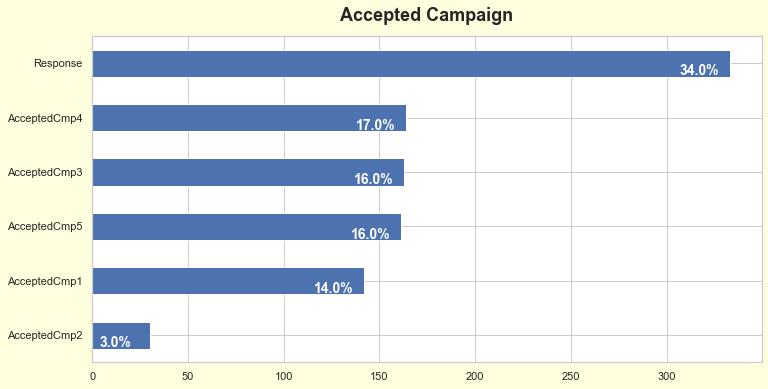

In [25]:
plt.figure(figsize=(12,6), facecolor='lightyellow')
ax = raw[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5', 'Response']].sum().sort_values(ascending=True).plot(kind='barh')
plt.title('Accepted Campaign', pad=15, fontsize=18, fontweight='semibold')

rects = ax.patches
for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    plt.annotate(f'\n{np.round((x_value/total_2)*100)}%', (x_value, y_value), xytext=(-50, 0),textcoords='offset points', va='center', ha='left', color = 'white', fontsize=14, fontweight='semibold')

#### Observation : From above graph, we can know that the more campaign company takes the more customers are likely to attain. 

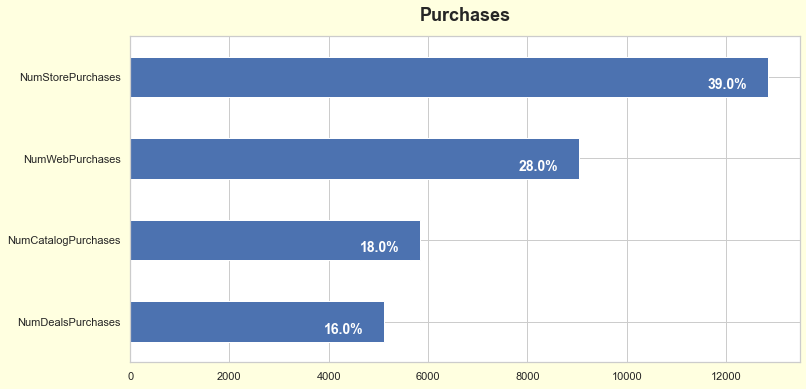

In [26]:
plt.figure(figsize=(12,6), facecolor='lightyellow')
ax = raw[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum().sort_values(ascending=True).plot(kind='barh')
plt.title('Purchases', pad=15, fontsize=18, fontweight='semibold')
rects = ax.patches
for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    plt.annotate(f'\n{np.round((x_value/total_3)*100)}%',(x_value, y_value), xytext=(-60, 0),textcoords='offset points', va='center', ha='left', color = 'white', fontsize=14, fontweight='semibold')

#### Observation : Based on the number purchases category graph, number of purchases made directly in stores is the highest.

### Bivariate Analysis

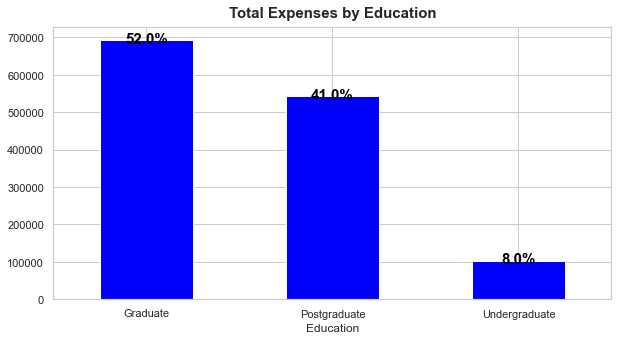

In [27]:
sns.set(style='whitegrid')
ax=raw[['Education','Total_Exp']].groupby('Education').sum().sort_values(by='Total_Exp',ascending=False).plot(kind='bar',figsize=(10,5), legend=None, color='blue')
plt.xticks(rotation=360)
plt.title('Total Expenses by Education',pad=10,fontsize=15,fontweight='semibold')

for p in ax.patches:
    ax.annotate(f'\n{np.round((p.get_height()/total_1)*100)}%',(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',va='center',fontsize=15,fontweight='semibold',xytext=(0,9),textcoords='offset points',color='black')

#### Observation : As we can see, customer from graduated educational level contributes the highest expense.

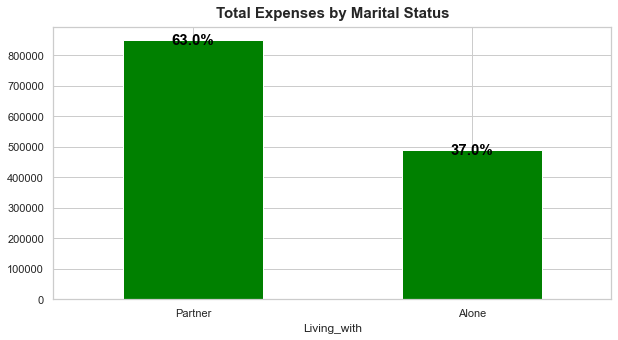

In [28]:
sns.set(style='whitegrid')
ax=raw[['Living_with','Total_Exp']].groupby('Living_with').sum().sort_values(by='Total_Exp',ascending=False).plot(kind='bar',figsize=(10,5),legend=None,color='green')
plt.xticks(rotation=360)
plt.title('Total Expenses by Marital Status',fontsize=15,fontweight='semibold',pad=10)

for p in ax.patches:
    ax.annotate(f'\n{np.round((p.get_height()/total_1)*100)}%',(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',va='center',xytext=(0,8),fontsize=15,fontweight='semibold',textcoords='offset points',color='black')

#### Observation: customers that are married contributes the highest expense. 

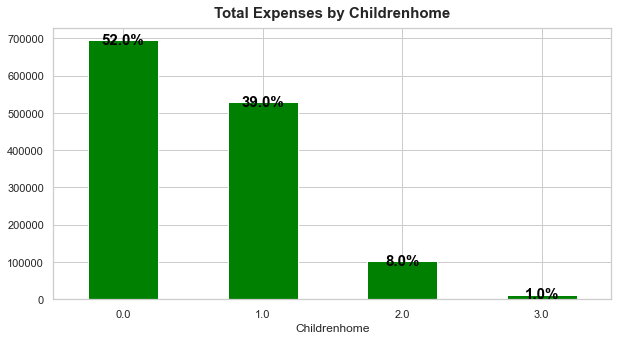

In [29]:
sns.set(style='whitegrid')
ax=raw[['Childrenhome','Total_Exp']].groupby('Childrenhome').sum().sort_values(by='Total_Exp',ascending=False).plot(kind='bar',figsize=(10,5),legend=None,color='green')
plt.xticks(rotation=360)
plt.title('Total Expenses by Childrenhome',fontsize=15,fontweight='semibold',pad=10)

for p in ax.patches:
    ax.annotate(f'\n{np.round((p.get_height()/total_1)*100)}%',(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',va='center',xytext=(0,8),fontsize=15,fontweight='semibold',textcoords='offset points',color='black')

#### Observation : Customers that doesn't have any kid at home contribute more to the Expenses.

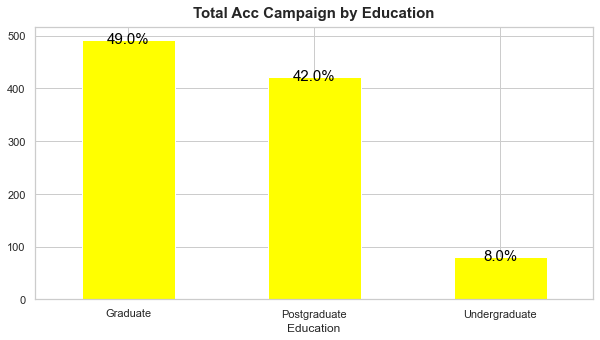

In [30]:
sns.set(style='whitegrid')
ax = raw[['Education','Total_Acc_Cmp']].groupby('Education').sum().sort_values(by='Total_Acc_Cmp',ascending=False).plot(kind='bar',figsize=(10,5),legend=None,color='yellow')
plt.xticks(rotation=360)
plt.title('Total Acc Campaign by Education',pad=10,fontsize=15,fontweight='semibold')

for p in ax.patches:
    ax.annotate(f'\n{np.round((p.get_height()/total_2)*100)}%', (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',xytext=(0,9), textcoords='offset points', color='black', fontsize=15)

#### Observation : As we can see Customers with graduated educational background accepted most campaigns.

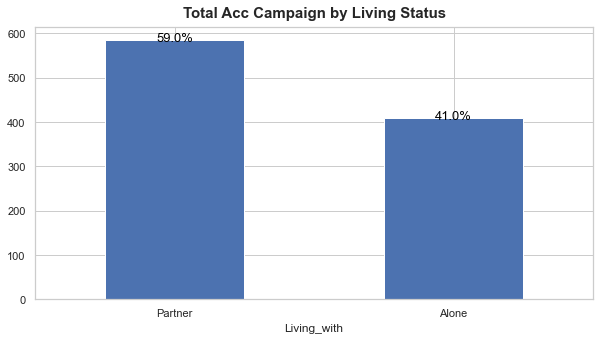

In [31]:
ax = raw[['Living_with','Total_Acc_Cmp']].groupby('Living_with').sum().sort_values(by='Total_Acc_Cmp', ascending=False).plot(kind='bar', figsize=(10,5), legend=None)
plt.xticks(rotation=360)
plt.title('Total Acc Campaign by Living Status', pad=10, fontsize=15, fontweight='semibold')
for p in ax.patches:
    ax.annotate(f'\n{np.round((p.get_height()/total_2)*100)}%', (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',xytext=(0,9), textcoords='offset points', color='black', fontsize=13)

#### Observation : Customers with Partner  Status Accepted more Campaign.

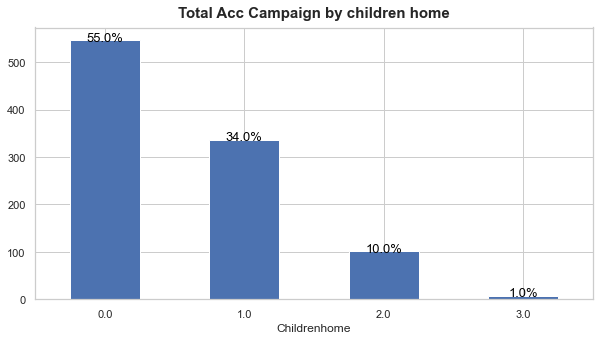

In [32]:
ax = raw[['Childrenhome','Total_Acc_Cmp']].groupby('Childrenhome').sum().sort_values(by='Total_Acc_Cmp', ascending=False).plot(kind='bar', figsize=(10,5), legend=None)
plt.xticks(rotation=360)
plt.title('Total Acc Campaign by children home', pad=10, fontsize=15, fontweight='semibold')
for p in ax.patches:
    ax.annotate(f'\n{np.round((p.get_height()/total_2)*100)}%', (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',xytext=(0,9), textcoords='offset points', color='black', fontsize=13)

#### Observation : Customers with no kid have high proportion of accepted campaign.

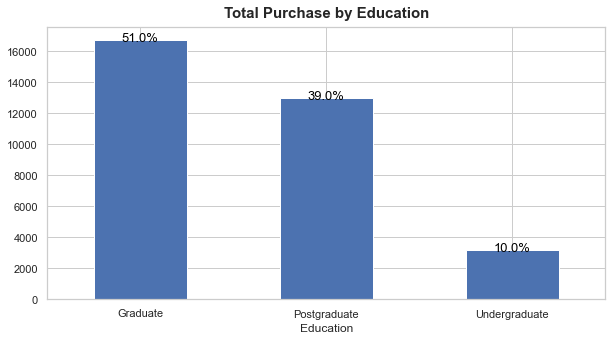

In [33]:
ax = raw[['Education','Total_Pur']].groupby('Education').sum().sort_values(by='Total_Pur', ascending=False).plot(kind='bar', figsize=(10,5), legend=None)
plt.xticks(rotation=360)
plt.title('Total Purchase by Education', pad=10, fontsize=15, fontweight='semibold')
for p in ax.patches:
    ax.annotate(f'\n{np.round((p.get_height()/total_3)*100)}%', (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',xytext=(0,9), textcoords='offset points', color='black', fontsize=13)

#### Observation : Large proportion of Purchase done by the Customer with Graduation background.

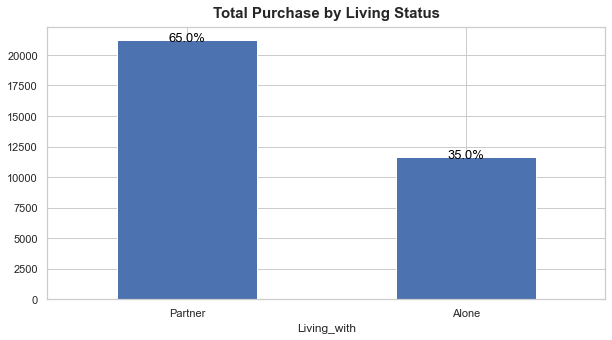

In [34]:
ax = raw[['Living_with','Total_Pur']].groupby('Living_with').sum().sort_values(by='Total_Pur', ascending=False).plot(kind='bar', figsize=(10,5), legend=None)
plt.xticks(rotation=360)
plt.title('Total Purchase by Living Status', pad=10, fontsize=15, fontweight='semibold')
for p in ax.patches:
    ax.annotate(f'\n{np.round((p.get_height()/total_3)*100)}%', (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',xytext=(0,9), textcoords='offset points', color='black', fontsize=13)

#### Observation : Large proportion of Purchase done by the Customer with Partner Status.

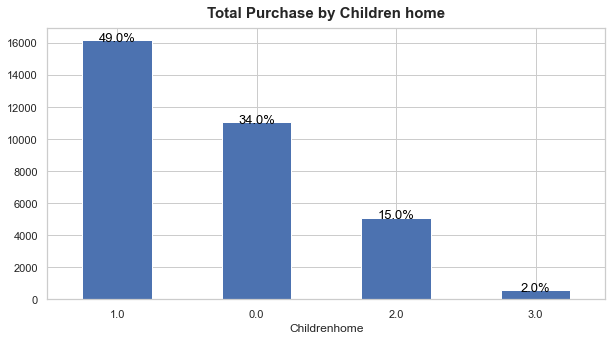

In [35]:
ax = raw[['Childrenhome','Total_Pur']].groupby('Childrenhome').sum().sort_values(by='Total_Pur', ascending=False).plot(kind='bar', figsize=(10,5), legend=None)
plt.xticks(rotation=360)
plt.title('Total Purchase by Children home', pad=10, fontsize=15, fontweight='semibold')
for p in ax.patches:
    ax.annotate(f'\n{np.round((p.get_height()/total_3)*100)}%', (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',xytext=(0,9), textcoords='offset points', color='black', fontsize=13)

#### Observation : Large proportion of Purchase done by the Customer who have one kid.

### Correlation Analysis

<AxesSubplot:>

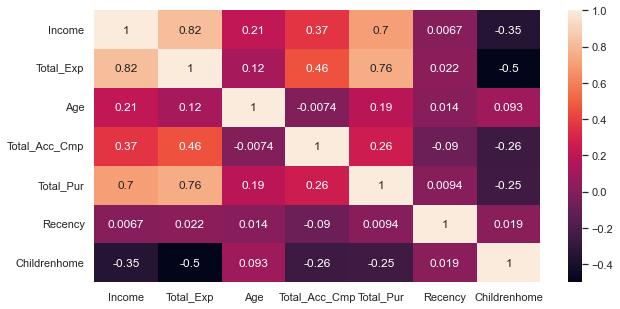

In [36]:
plt.figure(figsize=(10,5))
sns.heatmap(raw[['Income','Total_Exp','Age', 'Total_Acc_Cmp','Total_Pur', 'Recency','Childrenhome']].corr(), annot=True)

#### Observation : Strong Correlation between Total purchase and Total expenses,between Income and Total Expenses.Moderate Correlation between Total Accepted Campaign and Total Expenses,between Total Purchase and Income.

### preprocessing

In [40]:
df_prep = raw.copy()  #making copy of data

In [57]:
 #using label encoder on 'Marital Status'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_prep['Living_with'] = le.fit_transform(df_prep['Living_with'])

# using ordinalencoder as here present order in the data
from sklearn.preprocessing import OrdinalEncoder
edu = ['Undergraduate','Graduate','Postgraduate']
oe = OrdinalEncoder(categories = ([edu]))
oe.fit(df_prep[['Education']])
df_prep['Education'] = oe.transform(df_prep[['Education']])

#### deleting features which i no longer needed

In [59]:
df_prep = df_prep.drop(['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Response', 'Complain'], axis=1)
df_proc = df_prep.copy()

#### Scaling using Standard Scaler 

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
std_scaler = np.array(df_proc[['Income','Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Age', 'Total_Acc_Cmp']])
scaler.fit(std_scaler)
df_proc[['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Age', 'Total_Acc_Cmp']] = scaler.transform(std_scaler)

### K-means

In [64]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,5):

    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)

    kmeans.fit(df_proc)

    wcss.append(kmeans.inertia_)

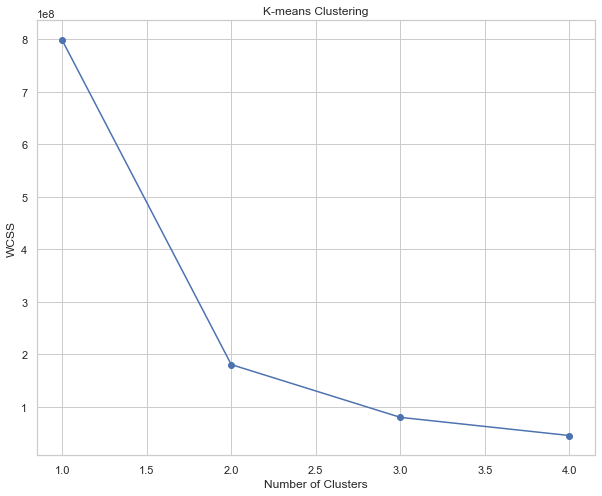

In [65]:
#elbow plot
plt.figure(figsize = (10,8))
plt.plot(range(1,5), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()


##### 2 is the best clustering based on elbow method

In [66]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df_proc)
label = kmeans.predict(df_proc)
data_segment = df_prep.copy()
data_segment['Segments'] = label

#### now let's look at people's characteristics at each cluster 

In [67]:
data_segment.groupby(['Segments']).mean()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Living_with,Childrenhome,Years_Since_Registration,Total_Exp,Total_Pur,Total_Acc_Cmp
Segments,,,,,,,,,,,,,,,,,,,,,
0,1.235836,40070.927762,0.652266,0.560198,48.500708,107.900850,9.429887,45.208924,12.847025,9.482295,...,1.048867,4.234419,6.218839,52.089943,0.653683,1.212465,10.920680,210.337819,10.961756,0.220963
1,1.321564,72189.872636,0.068096,0.411097,49.914250,659.189155,56.625473,379.165195,82.109710,58.548550,...,5.488020,8.653216,3.766709,54.886507,0.629256,0.479193,11.064313,1312.793190,21.878941,0.858764


#### now let's label it

In [68]:
data_segment['Labels'] = data_segment['Segments'].map({1:'well-off',0:'fewer-opportunities'})

C:\Users\Siddhant Sonawane\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


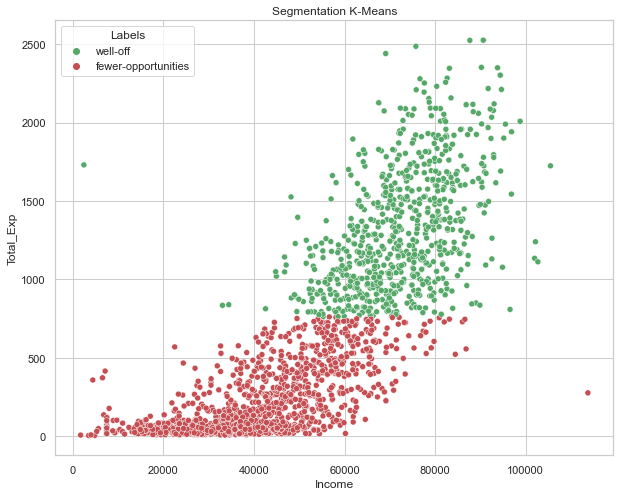

In [70]:
#plotting segments
plt.figure(figsize = (10,8))
sns.scatterplot(data_segment['Income'], data_segment['Total_Exp'], hue = data_segment['Labels'], palette= ['g','r'])
plt.title('Segmentation K-Means')
plt.show()

### Agglomerative

In [71]:
from sklearn.cluster import AgglomerativeClustering
agl =  AgglomerativeClustering(n_clusters=2)
agl.fit(df_proc)
label = agl.labels_
data_segment_3 = df_prep.copy()
data_segment_3['cluster'] = label
data_segment_3.groupby(['cluster']).mean()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Living_with,Childrenhome,Years_Since_Registration,Total_Exp,Total_Pur,Total_Acc_Cmp
cluster,,,,,,,,,,,,,,,,,,,,,
0,1.322581,72105.197270,0.071960,0.414392,49.885856,654.914392,56.131514,375.795285,81.795285,58.236973,...,5.452854,8.647643,3.776675,54.841191,0.631514,0.486352,11.063275,1303.738213,21.872208,0.847395
1,1.234453,39821.250893,0.655468,0.559685,48.503931,105.240886,9.275911,44.047177,12.384560,9.205861,...,1.027877,4.196569,6.235883,52.090064,0.652609,1.215154,10.919943,205.310222,10.864189,0.221587


##### Above result is pretty much similar with k-means 

In [74]:
#Let’s see the optimum number of clustering based on the silhouette score
from sklearn.metrics import silhouette_score


for i in range(2,10):

    agl =  AgglomerativeClustering(n_clusters=i)

    agl.fit(df_proc)

    label = agl.labels_

    score = silhouette_score(df_proc, label)

    print("Untuk k=",i,"silhouette score=",score)

Untuk k= 2 silhouette score= 0.6972335941981381
Untuk k= 3 silhouette score= 0.6573336082130071
Untuk k= 4 silhouette score= 0.6189998673031857
Untuk k= 5 silhouette score= 0.6198659357357341
Untuk k= 6 silhouette score= 0.6263085125341418
Untuk k= 7 silhouette score= 0.5770765008251295
Untuk k= 8 silhouette score= 0.571889938914746
Untuk k= 9 silhouette score= 0.5841422358376371


#### getting same result for number of clusters

#### The clustering is mostly based on income, expenses, number of purchases by it’s category, and total accepted campaign. Education level, marital status, and age did not affect the clustering. So, there are 2 segmentations which is the best number of clustering based on the model. Segment 0 which the customers had low income and low expenses. Segment 1 which the customers had high income and high expenses, which is better to focus on.